In [3]:
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import sys

In [169]:
boston = datasets.load_boston()
data = np.array(boston.data)
target = np.array(boston.target).reshape((-1,1))

In [171]:
data.shape

(506, 13)

In [23]:
def setting_data(data=None):
    feature_matrix = np.ones((np.ma.size(data,axis=0),np.ma.size(data,axis=1)+1))
    feature_matrix[:,1:] = data
    return feature_matrix

In [5]:
def predict_values(feature_matrix=None, weights=None):
    return np.dot(a=feature_matrix,b=weights)

In [6]:
def feature_derivative(feature=None, errors=None):
    return 2*np.dot(feature,errors)

In [174]:
def gradient_descent(data=None,target=None,tolerance_gradient=0.01, tolerance_cost=0.0000001, step_size = 0.001):
    
    feature_matrix = setting_data(data=data)#, target=target)
    
    weights = np.zeros(np.ma.size(data,axis=1)+1).reshape((-1,1))
    partials = np.zeros(np.ma.size(data,axis=1)+1).reshape((-1,1))
    
    i = 0
    prev_cost = 10
    costs = np.array([])
    gradients = np.array([])
    
    converged = False
    while not converged:
        i += 1
        
        predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
        errors = np.subtract(predicted, target)
#         print('errors')
#         print(errors)
        #Updating weights
        
        #taking derivative
        partials = np.dot(feature_matrix.T,errors)
        weights = np.subtract(weights,np.multiply(step_size,partials))
        
        gradient_magnitude = np.sqrt(np.sum(np.square(partials)))
        cur_cost = np.sum(np.square(errors))
        
        gradients = np.append(gradients,gradient_magnitude)
        costs = np.append(costs,cur_cost)
        if i%1000==0:
            print(cur_cost)
#         print(abs(cur_cost - prev_cost))
        if (gradient_magnitude <= tolerance_gradient) or (abs(cur_cost - prev_cost) < tolerance_cost):
            if gradient_magnitude <= tolerance_gradient:
                print('Gradient Magnitude - Tolerance')
            else:
                print('Cost Tolerance - Precision')
            converged = True
        if i >= 150000:
            print('Iterations')
            return (i, weights,gradients, costs)
        
        prev_cost = cur_cost
    return (i, weights,gradients, costs)

In [176]:
i,cal_weights, grads, costs = gradient_descent(data=data, target=target,step_size=0.00000001,tolerance_cost=0.1,tolerance_gradient=0.1)

34249.9374426377
31917.623358989513
30234.9615240887
28945.127486837006
27936.37986263098
27133.412430375756
26483.175411690623
25947.774084863224
25499.82012543125
25119.296367411072
24791.41481065417
24505.136117091293
24252.13491082293
24026.069034365944
23822.05840190369
23636.309950625575
23465.845465276314
23308.302521736397
23161.787849165856
23024.768565089507
22895.99096861732
22774.419516110876
22659.19066562759
22549.57773629856
22444.963970786943
Cost Tolerance - Precision


In [177]:
cal_weights

array([[ 6.02718853e-02],
       [-9.33857240e-02],
       [ 1.07608663e-01],
       [-6.33260647e-02],
       [ 4.10368674e-02],
       [ 2.48146184e-02],
       [ 6.49249633e-01],
       [ 1.14675224e-01],
       [ 3.58278760e-02],
       [ 6.68908442e-02],
       [ 6.07760526e-04],
       [ 4.06481583e-01],
       [ 3.16844026e-02],
       [-7.80791003e-01]])

In [154]:
i

148673

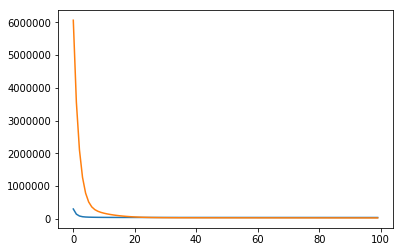

In [180]:
sns.lineplot(x=range(100),y=costs[:100])
sns.lineplot(x=range(100),y=grads[:100])

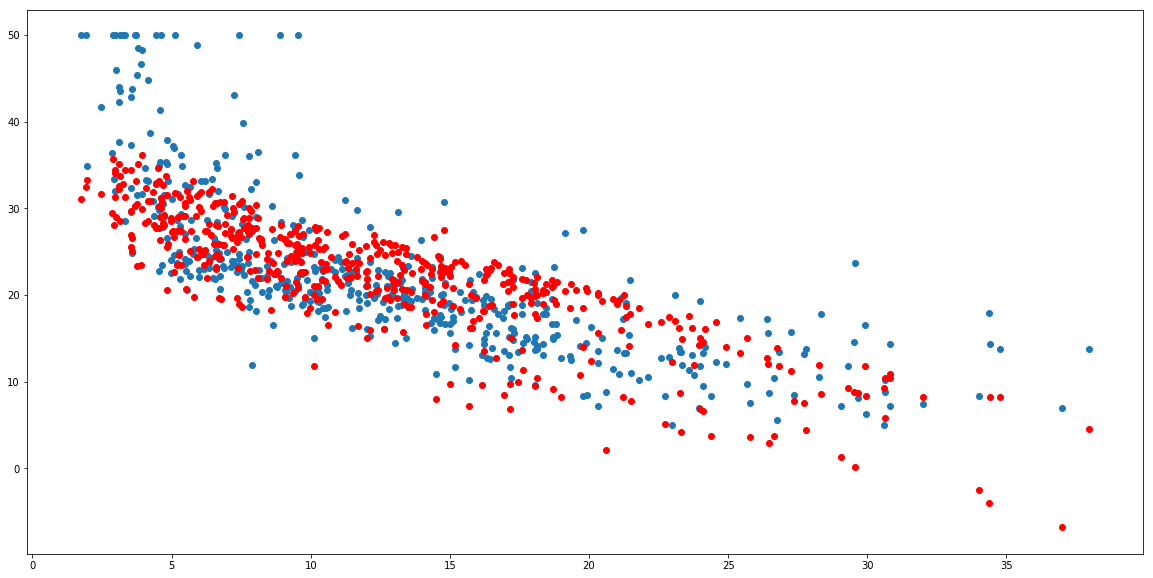

In [199]:
feature = 12
plt.figure(figsize=(20,10))
feature_matrix = setting_data(data=data)
predicted = predict_values(feature_matrix=feature_matrix, weights=cal_weights)
plt.scatter(data[:,feature],target)
plt.scatter(data[:,feature],predicted,color='r')

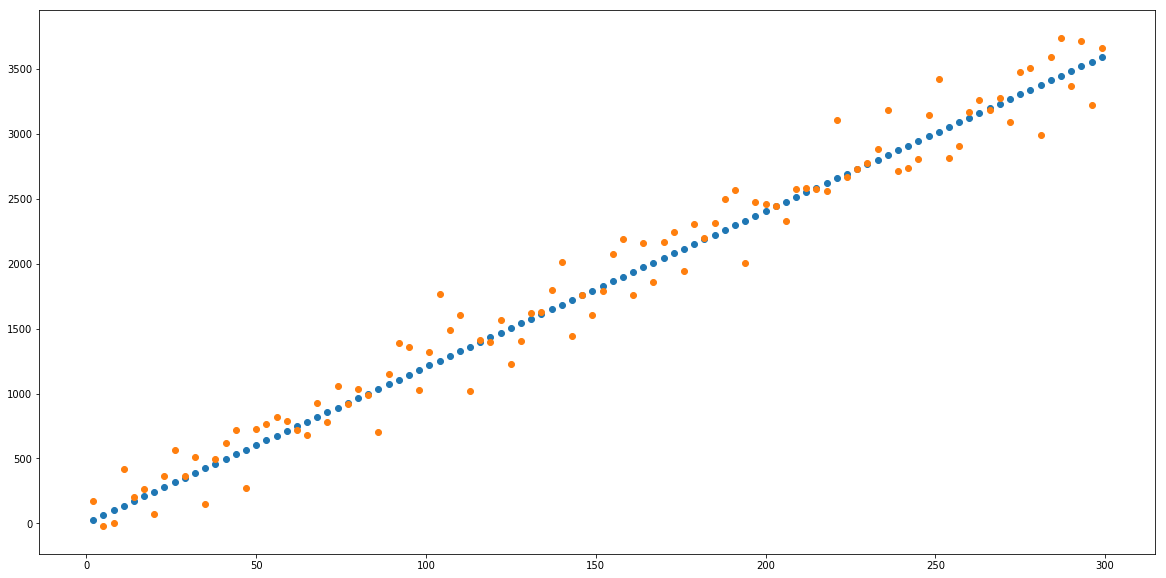

In [118]:
plt.figure(figsize=(20,10))
data = np.arange(1,301,1).reshape(100,3)
target = ((2) + (3)*data[:,0] + (4)*data[:,1] + (5)*data[:,2]).reshape(-1,1)
target_noise = target + 200 * np.random.randn(*target.shape)
plt.scatter(x=data[:,1].reshape(-1,1),y=target,label='Normal Data')
plt.scatter(x=data[:,1].reshape(-1,1),y=target_noise,label='Noised Data')
plt.show()

(100,)

In [71]:
x = np.random.rand(200).reshape(200,1)
y = ((2) + (3)*x[:,0] + (5)*x[:,0]).reshape(200,1)

In [66]:
x = np.array([[1.00000000e+00, 3.95789450e-02, 1.56649288e-03, 6.20001356e-05,
        2.45389995e-06, 9.71227712e-08, 3.84401681e-09, 1.52142130e-10,
        6.02162498e-12, 2.38329564e-13, 9.43283268e-15, 3.73341565e-16,
        1.47764653e-17, 5.84836905e-19, 2.31472277e-20, 9.16142850e-22,
        3.62599674e-23],
       [1.00000000e+00, 4.15680997e-02, 1.72790691e-03, 7.18258067e-05,
        2.98566229e-06, 1.24108308e-07, 5.15894651e-09, 2.14447603e-10,
        8.91417933e-12, 3.70545495e-13, 1.54028721e-14, 6.40268121e-16,
        2.66147291e-17, 1.10632371e-18, 4.59877743e-20, 1.91162439e-21,
        7.94625931e-23],
       [1.00000000e+00, 7.24319481e-02, 5.24638710e-03, 3.80006038e-04,
        2.75245776e-05, 1.99365878e-06, 1.44404589e-07, 1.04595057e-08,
        7.57602374e-10, 5.48746158e-11, 3.97467532e-12, 2.87893477e-13,
        2.08526854e-14, 1.51040062e-15, 1.09401259e-16, 7.92414635e-18,
        5.73961357e-19],
       [1.00000000e+00, 1.50289045e-01, 2.25867969e-02, 3.39454813e-03,
        5.10163396e-04, 7.66719693e-05, 1.15229570e-05, 1.73177420e-06,
        2.60266690e-07, 3.91152322e-08, 5.87859088e-09, 8.83487808e-10,
        1.32778539e-10, 1.99551597e-11, 2.99904189e-12, 4.50723140e-13,
        6.77387501e-14],
       [1.00000000e+00, 1.61334145e-01, 2.60287062e-02, 4.19931904e-03,
        6.77493546e-04, 1.09302842e-04, 1.76342804e-05, 2.84501155e-06,
        4.58997504e-07, 7.40519697e-08, 1.19471112e-08, 1.92747696e-09,
        3.10967847e-10, 5.01697315e-11, 8.09409071e-12, 1.30585320e-12,
        2.10678709e-13],
       [1.00000000e+00, 1.91956313e-01, 3.68472260e-02, 7.07305764e-03,
        1.35771807e-03, 2.60622554e-04, 5.00281444e-05, 9.60321814e-06,
        1.84339835e-06, 3.53851949e-07, 6.79241155e-08, 1.30384628e-08,
        2.50281524e-09, 4.80431184e-10, 9.22217987e-11, 1.77025564e-11,
        3.39811746e-12],
       [1.00000000e+00, 2.32833917e-01, 5.42116330e-02, 1.26223069e-02,
        2.93890115e-03, 6.84275867e-04, 1.59322630e-04, 3.70957121e-05,
        8.63713997e-06, 2.01101913e-06, 4.68233462e-07, 1.09020631e-07,
        2.53837006e-08, 5.91018644e-09, 1.37609186e-09, 3.20400858e-10,
        7.46001868e-11],
       [1.00000000e+00, 2.59900980e-01, 6.75485195e-02, 1.75559264e-02,
        4.56280249e-03, 1.18587684e-03, 3.08210553e-04, 8.01042247e-05,
        2.08191665e-05, 5.41092179e-06, 1.40630388e-06, 3.65499756e-07,
        9.49937447e-08, 2.46889674e-08, 6.41668682e-09, 1.66770319e-09,
        4.33437695e-10],
       [1.00000000e+00, 3.80145815e-01, 1.44510841e-01, 5.49351912e-02,
        2.08833830e-02, 7.93873066e-03, 3.01787524e-03, 1.14723264e-03,
        4.36115687e-04, 1.65787553e-04, 6.30234445e-05, 2.39580987e-05,
        9.10757095e-06, 3.46220498e-06, 1.31614273e-06, 5.00326152e-07,
        1.90196893e-07],
       [1.00000000e+00, 4.32444724e-01, 1.87008439e-01, 8.08708126e-02,
        3.49721562e-02, 1.51235244e-02, 6.54008834e-03, 2.82822669e-03,
        1.22305171e-03, 5.28902259e-04, 2.28720991e-04, 9.89091857e-05,
        4.27727555e-05, 1.84968524e-05, 7.99886623e-06, 3.45906749e-06,
        1.49585549e-06],
       [1.00000000e+00, 4.70566982e-01, 2.21433284e-01, 1.04199192e-01,
        4.90326995e-02, 2.30731694e-02, 1.08574717e-02, 5.10916768e-03,
        2.40420562e-03, 1.13133978e-03, 5.32371146e-04, 2.50516283e-04,
        1.17884691e-04, 5.54726435e-05, 2.61035944e-05, 1.22834896e-05,
        5.78020465e-06],
       [1.00000000e+00, 4.71494604e-01, 2.22307161e-01, 1.04816627e-01,
        4.94204740e-02, 2.33014868e-02, 1.09865253e-02, 5.18008739e-03,
        2.44238325e-03, 1.15157052e-03, 5.42959288e-04, 2.56002374e-04,
        1.20703738e-04, 5.69111611e-05, 2.68333054e-05, 1.26517587e-05,
        5.96523595e-06],
       [1.00000000e+00, 4.78706401e-01, 2.29159818e-01, 1.09700272e-01,
        5.25142222e-02, 2.51388943e-02, 1.20341496e-02, 5.76082444e-03,
        2.75774353e-03, 1.32014948e-03, 6.31964006e-04, 3.02525215e-04,
        1.44820757e-04, 6.93266232e-05, 3.31870983e-05, 1.58868764e-05,
        7.60514940e-06],
       [1.00000000e+00, 4.90535539e-01, 2.40625115e-01, 1.18035171e-01,
        5.79004461e-02, 2.84022265e-02, 1.39323015e-02, 6.83428904e-03,
        3.35246166e-03, 1.64450159e-03, 8.06686473e-04, 3.95708384e-04,
        1.94109026e-04, 9.52173755e-05, 4.67075066e-05, 2.29116920e-05,
        1.12389992e-05],
       [1.00000000e+00, 5.46780059e-01, 2.98968433e-01, 1.63469977e-01,
        8.93821239e-02, 4.88723630e-02, 2.67224335e-02, 1.46112938e-02,
        7.98916408e-03, 4.36831561e-03, 2.38850787e-03, 1.30598847e-03,
        7.14088454e-04, 3.90449327e-04, 2.13489906e-04, 1.16732023e-04,
        6.38267427e-05],
       [1.00000000e+00, 5.69680358e-01, 3.24535710e-01, 1.84881620e-01,
        1.05323427e-01, 6.00006877e-02, 3.41812133e-02, 1.94723658e-02,
        1.10930243e-02, 6.31947807e-03, 3.60008253e-03, 2.05089630e-03,
        1.16835534e-03, 6.65589089e-04, 3.79173030e-04, 2.16007428e-04,
        1.23055189e-04],
       [1.00000000e+00, 6.07932454e-01, 3.69581868e-01, 2.24680812e-01,
        1.36590757e-01, 8.30379542e-02, 5.04814673e-02, 3.06893223e-02,
        1.86570350e-02, 1.13422171e-02, 6.89530184e-03, 4.19187777e-03,
        2.54837854e-03, 1.54924202e-03, 9.41834501e-04, 5.72571759e-04,
        3.48084954e-04],
       [1.00000000e+00, 6.20237537e-01, 3.84694603e-01, 2.38602033e-01,
        1.47989937e-01, 9.17889143e-02, 5.69309302e-02, 3.53106999e-02,
        2.19010216e-02, 1.35838357e-02, 8.42520479e-03, 5.22562827e-03,
        3.24113081e-03, 2.01027099e-03, 1.24684553e-03, 7.73340400e-04,
        4.79654745e-04],
       [1.00000000e+00, 6.30093134e-01, 3.97017357e-01, 2.50157911e-01,
        1.57622782e-01, 9.93170326e-02, 6.25789803e-02, 3.94305858e-02,
        2.48449414e-02, 1.56546270e-02, 9.86387297e-03, 6.21515863e-03,
        3.91612878e-03, 2.46752585e-03, 1.55477110e-03, 9.79650593e-04,
        6.17271112e-04],
       [1.00000000e+00, 6.45009669e-01, 4.16037474e-01, 2.68348193e-01,
        1.73087179e-01, 1.11642904e-01, 7.20107528e-02, 4.64476319e-02,
        2.99591717e-02, 1.93239554e-02, 1.24641381e-02, 8.03948959e-03,
        5.18554852e-03, 3.34472894e-03, 2.15738251e-03, 1.39153258e-03,
        8.97551967e-04],
       [1.00000000e+00, 6.46757604e-01, 4.18295398e-01, 2.70535730e-01,
        1.74971040e-01, 1.13163851e-01, 7.31895810e-02, 4.73359181e-02,
        3.06148650e-02, 1.98003967e-02, 1.28060571e-02, 8.28241483e-03,
        5.35671477e-03, 3.46449601e-03, 2.24068914e-03, 1.44918274e-03,
        9.37269957e-04],
       [1.00000000e+00, 6.99089779e-01, 4.88726519e-01, 3.41663714e-01,
        2.38853611e-01, 1.66980118e-01, 1.16734094e-01, 8.16076117e-02,
        5.70510473e-02, 3.98838040e-02, 2.78823597e-02, 1.94922727e-02,
        1.36268486e-02, 9.52639059e-03, 6.65980229e-03, 4.65579971e-03,
        3.25482199e-03],
       [1.00000000e+00, 7.90245046e-01, 6.24487233e-01, 4.93497943e-01,
        3.89984305e-01, 3.08183165e-01, 2.43540220e-01, 1.92456452e-01,
        1.52087758e-01, 1.20186597e-01, 9.49768632e-02, 7.50549957e-02,
        5.93118385e-02, 4.68708866e-02, 3.70394859e-02, 2.92702703e-02,
        2.31306861e-02],
       [1.00000000e+00, 8.10384651e-01, 6.56723283e-01, 5.32198469e-01,
        4.31285470e-01, 3.49507125e-01, 2.83235210e-01, 2.29529467e-01,
        1.86007157e-01, 1.50737345e-01, 1.22155231e-01, 9.89927240e-02,
        8.02221841e-02, 6.50108267e-02, 5.26837761e-02, 4.26941235e-02,
        3.45986624e-02],
       [1.00000000e+00, 8.29320894e-01, 6.87773145e-01, 5.70384640e-01,
        4.73031899e-01, 3.92295238e-01, 3.25338637e-01, 2.69810130e-01,
        2.23759178e-01, 1.85568161e-01, 1.53895554e-01, 1.27628798e-01,
        1.05845229e-01, 8.77796599e-02, 7.27975060e-02, 6.03724928e-02,
        5.00681697e-02],
       [1.00000000e+00, 8.50111558e-01, 7.22689660e-01, 6.14366833e-01,
        5.22280345e-01, 4.43996558e-01, 3.77446605e-01, 3.20871722e-01,
        2.72776759e-01, 2.31890675e-01, 1.97132943e-01, 1.67584993e-01,
        1.42465940e-01, 1.21111942e-01, 1.02958662e-01, 8.75263482e-02,
        7.44071602e-02],
       [1.00000000e+00, 8.86368437e-01, 7.85649006e-01, 6.96374481e-01,
        6.17244361e-01, 5.47105919e-01, 4.84937418e-01, 4.29833222e-01,
        3.80990601e-01, 3.37698043e-01, 2.99324887e-01, 2.65312132e-01,
        2.35164300e-01, 2.08442213e-01, 1.84756598e-01, 1.63762417e-01,
        1.45153838e-01],
       [1.00000000e+00, 8.91141079e-01, 7.94132423e-01, 7.07684025e-01,
        6.30646306e-01, 5.61994830e-01, 5.00816679e-01, 4.46298316e-01,
        3.97714763e-01, 3.54419963e-01, 3.15838189e-01, 2.81456384e-01,
        2.50817346e-01, 2.23513641e-01, 1.99182187e-01, 1.77499429e-01,
        1.58177033e-01],
       [1.00000000e+00, 9.04388481e-01, 8.17918525e-01, 7.39716093e-01,
        6.68990714e-01, 6.05027496e-01, 5.47179898e-01, 4.94863197e-01,
        4.47548575e-01, 4.04757776e-01, 3.66058271e-01, 3.31058884e-01,
        2.99405841e-01, 2.70779194e-01, 2.44889584e-01, 2.21475319e-01,
        2.00299727e-01],
       [1.00000000e+00, 9.24485867e-01, 8.54674118e-01, 7.90134142e-01,
        7.30467847e-01, 6.75307201e-01, 6.24311963e-01, 5.77167586e-01,
        5.33583276e-01, 4.93290197e-01, 4.56039815e-01, 4.21602364e-01,
        3.89765427e-01, 3.60332628e-01, 3.33122422e-01, 3.07966971e-01,
        2.84711112e-01]])

y = np.array([[ 0.41323784],
       [-0.11998051],
       [ 0.55366309],
       [ 0.75367721],
       [ 0.43158418],
       [ 0.79391324],
       [ 0.51401471],
       [ 0.53601411],
       [ 1.0429034 ],
       [ 0.90444413],
       [ 1.22404039],
       [ 0.7808718 ],
       [ 1.59918533],
       [ 0.61791911],
       [ 0.89415458],
       [ 1.13210032],
       [ 0.41054982],
       [ 0.45195892],
       [ 0.75600535],
       [ 0.78153462],
       [ 0.38219075],
       [ 0.08763392],
       [-0.61837534],
       [ 0.02814502],
       [ 0.25466952],
       [-0.33537753],
       [-0.00175592],
       [-1.33583581],
       [-0.76934465],
       [-0.50188481]])